## Exploratory Data Analysis and Introduction

### Project Questions to explore 

1. What are the most demanded skills for the top 3 most popular data roles?
2. How are in–demand skills trending for data analysts? 
3. How well do jobs and skills pay for data analysts?
4. What is the most optimal skill to learn for data analysts based on demand and salary?

For this analysis, I will be mostly focusing on Data Analyst Roles in the United States

In [14]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
#importing libraries

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
# loading data

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) 

#data cleanup

### Exploratory Data Analysis
#### 1. Top 10 countries with the greatest number of job postings

In [15]:
top_10_countries = df['job_country'].value_counts().to_frame().head(10)
top_10_countries

,count
job_country,
United States,206292
India,51088
United Kingdom,40375
France,39922
Germany,27694
Spain,25100
Singapore,23696
Sudan,21781
Netherlands,20631


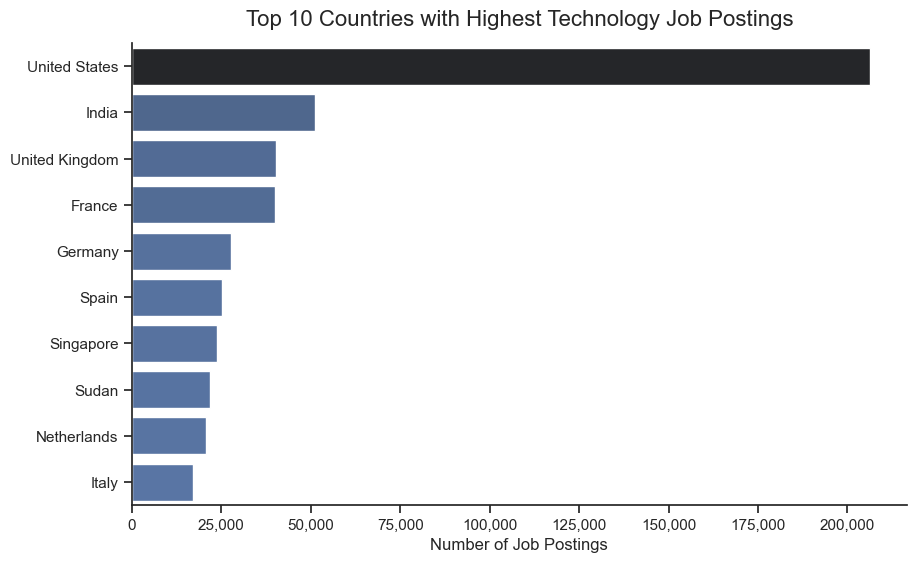

In [65]:
plt.figure(figsize=(10, 6))
sns.set_theme(style='ticks')
sns.barplot(data=top_10_countries, x='count', y=top_10_countries.index,  hue='count', palette='dark:b_r')
sns.despine()

plt.title('Top 10 Countries with Highest Technology Job Postings', fontsize=16, y=1.02)
plt.ylabel('')
plt.xlabel('Number of Job Postings')
plt.legend().set_visible(False) 

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x):,}'))

plt.show()

#### 2. Number of technology job postings in the US

In [67]:
df_US = df[df['job_country'] == 'United States']
df_US.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","[sql, python, java, sql server, gcp, bigquery,...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","[sql, python, r, mongodb, mongodb, sql server,...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."


In [72]:
US_job_counts = df_US['job_title_short'].value_counts().to_frame()
US_job_counts

,count
job_title_short,
Data Analyst,67816
Data Scientist,58830
Data Engineer,35080
Senior Data Scientist,12946
Senior Data Analyst,11791
Senior Data Engineer,9289
Business Analyst,7382
Software Engineer,1814
Machine Learning Engineer,921


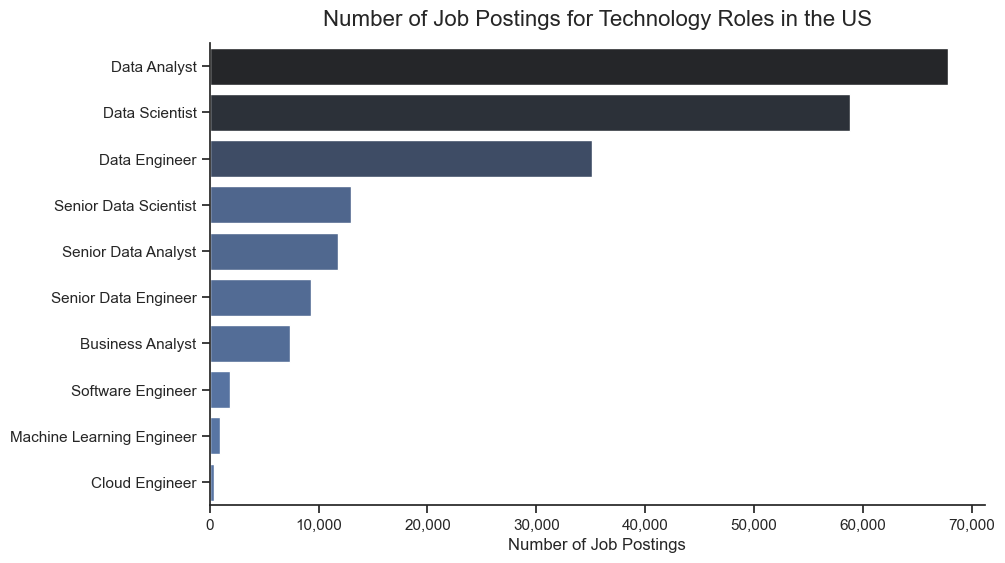

In [76]:
plt.figure(figsize=(10, 6))
sns.set_theme(style='ticks')
sns.barplot(data=US_job_counts, x='count', y=US_job_counts.index,  hue='count', palette='dark:b_r')
sns.despine()

plt.title('Number of Job Postings for Technology Roles in the US', fontsize=16, y=1.02)
plt.ylabel('')
plt.xlabel('Number of Job Postings')
plt.legend().set_visible(False) 

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x):,}'))

plt.show()

#### 3. Top 15 companies with the greatest number job postings for Data Analysts in the US

In [83]:
job_list = ['Data Analyst']

In [84]:
df_US_data = df_US[df_US['job_title_short'].isin (job_list)]
df_US_data

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}"
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,"[word, excel, powerpoint, outlook]","{'analyst_tools': ['word', 'excel', 'powerpoin..."
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,None,NaN,NaN,Nesco Resource,"[sas, sas, word, excel]","{'analyst_tools': ['sas', 'word', 'excel'], 'p..."
93,Data Analyst,IT Finance / TBM Data Analyst - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-06-10 13:00:05,False,False,United States,None,NaN,NaN,Get It Recruit - Information Technology,"[oracle, azure, power bi, excel, word, powerpo...","{'analyst_tools': ['power bi', 'excel', 'word'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785603,Data Analyst,Junior Data Analyst,"Santa Monica, CA",via Trabajo.org,Full-time,False,"California, United States",2023-09-12 06:00:50,False,False,United States,None,NaN,NaN,"Ramax Search, Inc.","[sql, vba, python, excel, flow]","{'analyst_tools': ['excel'], 'other': ['flow']..."
785626,Data Analyst,Data Acquisition Associate,"Tarrytown, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-29 06:01:29,False,False,United States,None,NaN,NaN,Planet Group,[microsoft teams],{'sync': ['microsoft teams']}
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


In [89]:
top_15_companies = df_US_data['company_name'].value_counts().to_frame().head(15)
top_15_companies

,count
company_name,
Robert Half,959
Insight Global,827
Dice,584
UnitedHealth Group,507
Get It Recruit - Information Technology,503
Citi,477
Corporate,416
SynergisticIT,374
Centene Corporation,350


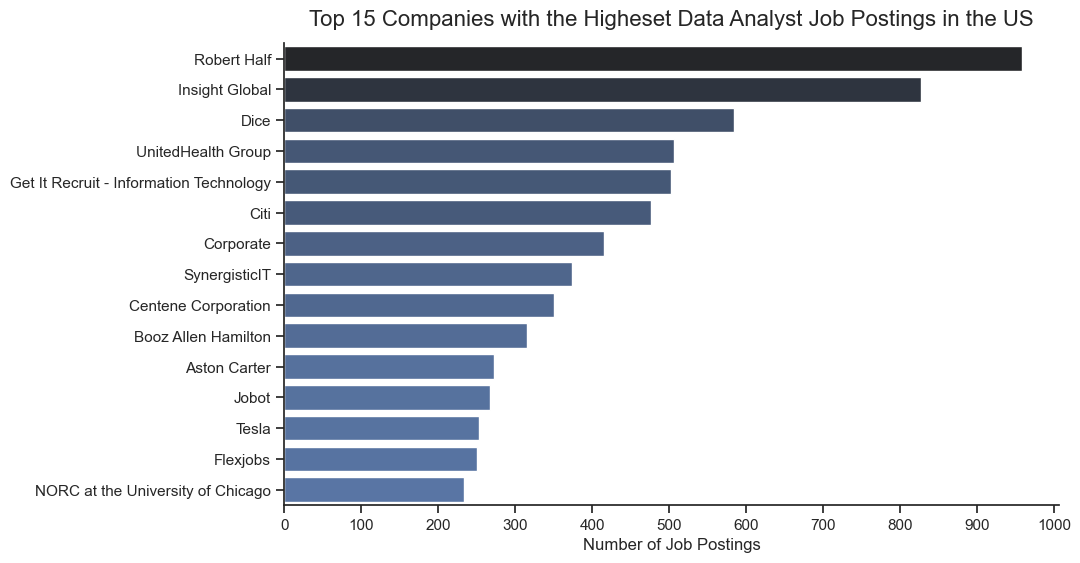

In [110]:
plt.figure(figsize=(10, 6))
sns.set_theme(style='ticks')
sns.barplot(data=top_15_companies, x='count', y=top_15_companies.index,  hue='count', palette='dark:b_r')
sns.despine()

plt.title('Top 15 Companies with the Higheset Data Analyst Job Postings in the US', fontsize=16, y=1.02)
plt.ylabel('')
plt.xlabel('Number of Job Postings')
plt.legend().set_visible(False) 

tick_values = range(0, 1100, 100)  # Change range as needed based on your data
ax = plt.gca()  # Get current axes
ax.set_xticks(tick_values)

plt.show()

#### 4. Proportion of Data Analyst Jobs in the US which:
- requires a degree
- provides health insurance
- offers work from home arrangements

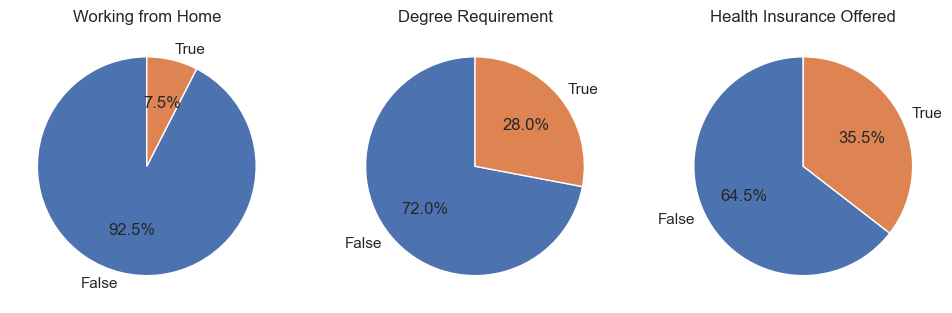

In [107]:
dict_pie = {
'job_work_from_home':'Working from Home',
'job_no_degree_mention':'Degree Requirement',
'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1,3) 
fig.set_size_inches(12, 5)

for i, (column, title) in enumerate(dict_pie.items()):
    ax[i].pie(df_US_data[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)

plt.show()